In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Understanding and Cleaning

In [2]:
file_path = "/Users/anthonyvictorio/mydata/Walmart_Sales.csv"
sales_df = pd.read_csv(file_path)
sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
sales_df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [4]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format="%d-%m-%Y")
sales_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [5]:
sales_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
sales_df['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [7]:
sales_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [8]:
sales_df.shape

(6435, 8)

In [9]:
sales_df['Store'].value_counts()

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: count, dtype: int64

In [10]:
sales_df.shape

(6435, 8)

In [11]:
sales_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# Data Distribution Plots

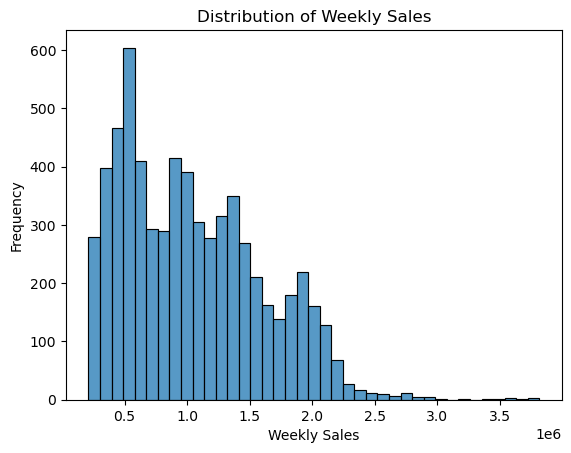

In [12]:
sns.histplot(sales_df['Weekly_Sales'])
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.savefig('weekly_sales_distribution.png')
plt.show()

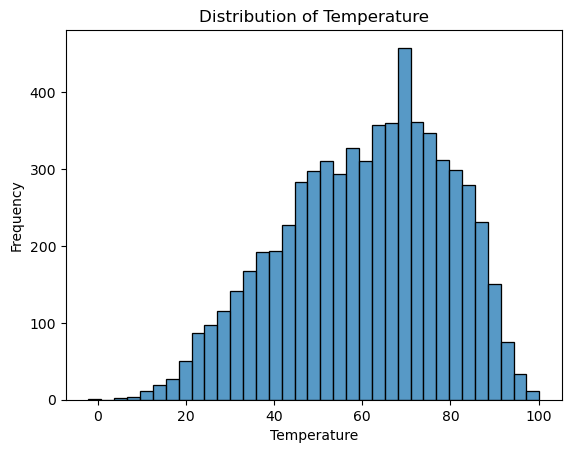

In [13]:
sns.histplot(sales_df['Temperature'])
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig('temperature_distribution.png')
plt.show()

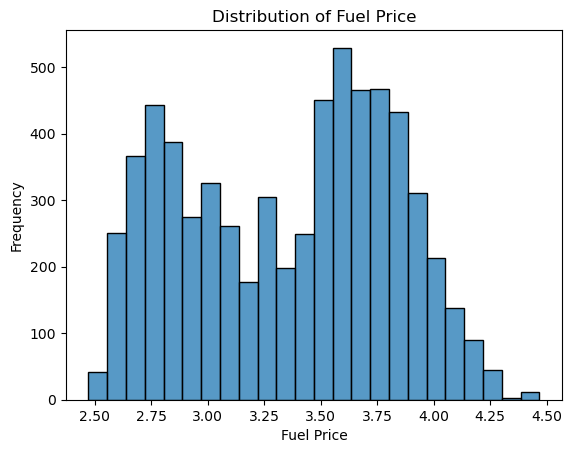

In [14]:
sns.histplot(sales_df['Fuel_Price'])
plt.title("Distribution of Fuel Price")
plt.xlabel("Fuel Price")
plt.ylabel("Frequency")
plt.savefig('fuel_price_distribution.png')
plt.show()

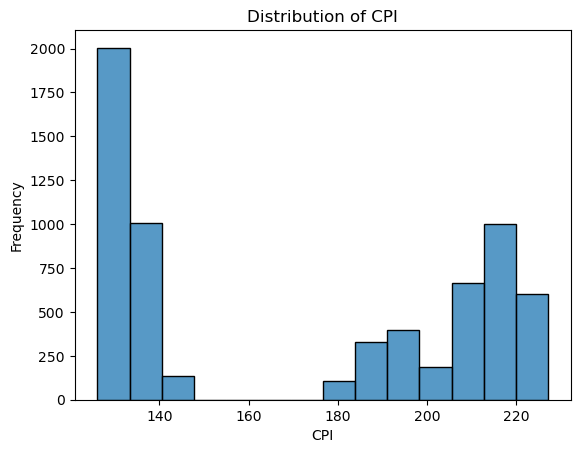

In [15]:
sns.histplot(sales_df['CPI'])
plt.title("Distribution of CPI")
plt.xlabel("CPI")
plt.ylabel("Frequency")
plt.savefig('CPI_distribution.png')
plt.show()

In [16]:
sales_df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
629,5,2011-03-11,293098.10,0,55.74,3.459,214.672990,6.634
3643,26,2011-05-27,996723.58,0,56.74,4.034,134.767774,7.818
3280,23,2012-08-31,1577468.78,0,68.34,3.884,138.377194,4.156
1545,11,2012-04-20,1315356.99,0,71.97,3.877,225.068954,6.664
6369,45,2011-07-29,704680.97,0,81.31,3.829,186.295596,8.625
71,1,2011-06-17,1532114.86,0,86.41,3.637,214.998060,7.682
4876,35,2010-05-14,1104277.57,0,53.82,2.982,136.010394,9.051
4192,30,2010-12-17,445332.28,0,48.63,2.869,211.064546,8.163
2896,21,2010-10-15,693412.05,0,68.61,2.720,211.471329,8.163
3551,25,2012-05-18,717207.19,0,58.21,3.848,214.548557,7.139


# Multiple Variable Plots

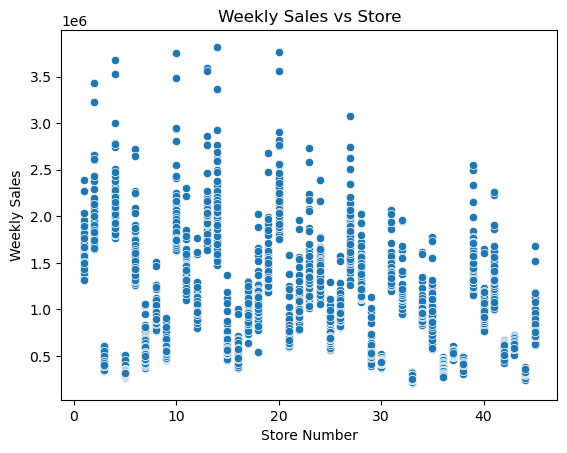

In [17]:
# Store vs Weekly Sales
sns.scatterplot(data=sales_df, x='Store', y='Weekly_Sales')
plt.title("Weekly Sales vs Store")
plt.ylabel("Weekly Sales")
plt.xlabel("Store Number")
plt.savefig('Store_vs_sales.png')
plt.show()

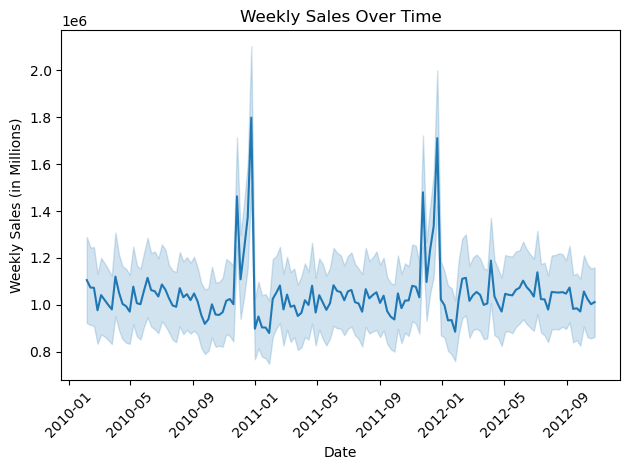

In [18]:
# Date vs Weekly Sales
sns.lineplot(data=sales_df, x='Date', y='Weekly_Sales')
plt.title("Weekly Sales Over Time")
plt.ylabel("Weekly Sales (in Millions)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Sales_over_time.png')
plt.show()

## Preparing data to fit into models

In [19]:
# extracting date features into a new dataframe
new_df = sales_df.copy()
new_df['Month'] = sales_df['Date'].dt.month
new_df['Week_of_Year'] = sales_df['Date'].dt.isocalendar().week

# Dropping original date column
new_df = new_df.drop(columns='Date')

new_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week_of_Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,9
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,39
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,10,40
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,10,41
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,42


In [21]:
# get dummy variables for store number
prepped_data = pd.get_dummies(new_df, columns=['Store'], drop_first=True)
prepped_data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week_of_Year,Store_2,Store_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1641957.44,1,38.51,2.548,211.242170,8.106,2,6,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1611968.17,0,39.93,2.514,211.289143,8.106,2,7,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1409727.59,0,46.63,2.561,211.319643,8.106,2,8,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1554806.68,0,46.50,2.625,211.350143,8.106,3,9,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,9,39,False,False,...,False,False,False,False,False,False,False,False,False,True
6431,733455.07,0,64.89,3.985,192.170412,8.667,10,40,False,False,...,False,False,False,False,False,False,False,False,False,True
6432,734464.36,0,54.47,4.000,192.327265,8.667,10,41,False,False,...,False,False,False,False,False,False,False,False,False,True
6433,718125.53,0,56.47,3.969,192.330854,8.667,10,42,False,False,...,False,False,False,False,False,False,False,False,False,True


In [22]:
x = prepped_data.drop(columns='Weekly_Sales')
y = sales_df['Weekly_Sales']

In [23]:
x

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week_of_Year,Store_2,Store_3,Store_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,42.31,2.572,211.096358,8.106,2,5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,38.51,2.548,211.242170,8.106,2,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,39.93,2.514,211.289143,8.106,2,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,46.63,2.561,211.319643,8.106,2,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,46.50,2.625,211.350143,8.106,3,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,64.88,3.997,192.013558,8.684,9,39,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6431,0,64.89,3.985,192.170412,8.667,10,40,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6432,0,54.47,4.000,192.327265,8.667,10,41,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6433,0,56.47,3.969,192.330854,8.667,10,42,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [24]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

## LINEAR REGRESSION MODEL

In [26]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

df_train = pd.concat([x_train, y_train], axis=1)

In [41]:
features = df_train.drop(columns=['Weekly_Sales']).columns
formula = 'Weekly_Sales ~ ' + ' + '.join(features)
lm = smf.ols(formula=formula, data=df_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:10:06   Log-Likelihood:                -59996.
No. Observations:                4504   AIC:                         1.201e+05
Df Residuals:                    4452   BIC:                         1.204e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.778e+06   2.56e+05      6.958      0.000    1.28e+06    2.28e+06
Store_2[T.True]   3.858e+05   2.18e+04     17.679      0.000    3.43e+05    4.29e+05
Store_3[T.True]  -1.152e+06   2.17e+04    -53.038      0.000   -1.19e+06   -1.11e+06
Store_4[T.True]   4.616e+05   1.07e+05      4.303      0.000    2.51e+05    6.72e+05
Store_5[T.True]  -1.259e+06   2.22e+04    -56.625      0.000    -1.3e+06   -1.22e+06
Store_6[T.True]  -1.859e+04   2.19e+04     -0.849      0.396   -6.15e+04    2.44e+04
Store_7[T.True]  -1.012e+06   3.35e+04    -30.190      0.000   -1.08e+06   -9.46e+05
Store_8[T.True]  -6.794e+05    2.2e+04    -30.896      0.000   -7.22e+05   -6.36e+05
Store_9[T.True]  -1.039e+06   2.25e+04    -46.279      0.000   -1.08e+06   -9.95e+05
Store_10[T.True]  3.406e+05   1.04e+05      3.264      0.001    1.36e+05    5.45e+05
Store_11[T.True]  -2.06e+05   2.18e+04     -9.437      0.000   -2.49e+05   -1.63e+05
Store_12[T.True]  -4.33e+05   9.83e+04     -4.404      0.000   -6.26e+05    -2.4e+05
Store_13[T.True]  3.693e+05   1.05e+05      3.502      0.000    1.63e+05    5.76e+05
Store_14[T.True]  4.461e+05   4.01e+04     11.121      0.000    3.67e+05    5.25e+05
Store_15[T.True] -9.718e+05   9.77e+04     -9.944      0.000   -1.16e+06    -7.8e+05
Store_16[T.True] -1.103e+06   3.62e+04    -30.510      0.000   -1.17e+06   -1.03e+06
Store_17[T.True] -7.442e+05   1.07e+05     -6.986      0.000   -9.53e+05   -5.35e+05
Store_18[T.True] -5.052e+05   9.56e+04     -5.284      0.000   -6.93e+05   -3.18e+05
Store_19[T.True] -1.499e+05   9.78e+04     -1.532      0.126   -3.42e+05     4.2e+04
Store_20[T.True]  5.387e+05   2.44e+04     22.049      0.000    4.91e+05    5.87e+05
Store_21[T.True] -8.011e+05   2.11e+04    -37.963      0.000   -8.43e+05    -7.6e+05
Store_22[T.True]  -5.54e+05   9.26e+04     -5.981      0.000   -7.36e+05   -3.72e+05
Store_23[T.True] -2.594e+05   1.04e+05     -2.495      0.013   -4.63e+05   -5.56e+04
Store_24[T.True] -2.398e+05   9.69e+04     -2.475      0.013    -4.3e+05   -4.99e+04
Store_25[T.True] -8.877e+05   2.35e+04    -37.796      0.000   -9.34e+05   -8.42e+05
Store_26[T.True] -5.939e+05   9.74e+04     -6.096      0.000   -7.85e+05   -4.03e+05
Store_27[T.True]  1.924e+05   9.33e+04      2.063      0.039    9530.891    3.75e+05
Store_28[T.True] -1.285e+05   9.83e+04     -1.307      0.191   -3.21e+05    6.42e+04
Store_29[T.True] -1.005e+06    9.4e+04    -10.695      0.000   -1.19e+06   -8.21e+05
Store_30[T.True] -1.117e+06   2.18e+04    -51.316      0.000   -1.16e+06   -1.07e+06
Store_31[T.True] -1.542e+05    2.2e+04     -7.007      0.000   -1.97e+05   -1.11e+05
Store_32[T.True] -3.985e+05    3.3e+04    -12.085      0.000   -4.63e+05   -3.34e+05
Store_33[T.True]  -1.28e+06   1.04e+05    -12.325      0.000   -1.48e+06   -1.08e+06
Store_34[T.True] -5.769

In [42]:
lm_train_preds = lm.predict(x_train)
lm_test_preds = lm.predict(x_test)

lm_train_mse = mean_squared_error(y_train, lm_train_preds)
lm_test_mse = mean_squared_error(y_test, lm_test_preds)

print(f'Linear model train MSE: {lm_train_mse}')
print(f'Linear model test MSE: {lm_test_mse}')

Linear model train MSE: 21761532666.420822
Linear model test MSE: 27072591030.828384


In [43]:
# removing store features with p-value > 0.05
features = features.drop(['Store_6','Store_19', 'Store_28'])
formula = 'Weekly_Sales ~ ' + ' + '.join(features)

lm2 = smf.ols(formula=formula, data=df_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1241.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:10:40   Log-Likelihood:                -59998.
No. Observations:                4504   AIC:                         1.201e+05
Df Residuals:                    4455   BIC:                         1.204e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.398e+06    6.8e+04     20.557      0.000    1.26e+06    1.53e+06
Store_2[T.True]   3.968e+05   1.87e+04     21.183      0.000     3.6e+05    4.34e+05
Store_3[T.True]  -1.145e+06   1.85e+04    -62.012      0.000   -1.18e+06   -1.11e+06
Store_4[T.True]   6.226e+05   2.38e+04     26.149      0.000    5.76e+05    6.69e+05
Store_5[T.True]  -1.244e+06   1.83e+04    -67.888      0.000   -1.28e+06   -1.21e+06
Store_7[T.True]  -9.688e+05   1.84e+04    -52.508      0.000      -1e+06   -9.33e+05
Store_8[T.True]   -6.68e+05    1.8e+04    -37.017      0.000   -7.03e+05   -6.33e+05
Store_9[T.True]  -1.028e+06   1.86e+04    -55.221      0.000   -1.06e+06   -9.91e+05
Store_10[T.True]   4.93e+05      2e+04     24.607      0.000    4.54e+05    5.32e+05
Store_11[T.True] -1.996e+05   1.86e+04    -10.758      0.000   -2.36e+05   -1.63e+05
Store_12[T.True] -3.016e+05   1.93e+04    -15.609      0.000   -3.39e+05   -2.64e+05
Store_13[T.True]  5.262e+05   2.17e+04     24.297      0.000    4.84e+05    5.69e+05
Store_14[T.True]   5.02e+05   1.65e+04     30.441      0.000     4.7e+05    5.34e+05
Store_15[T.True] -8.279e+05   1.87e+04    -44.301      0.000   -8.65e+05   -7.91e+05
Store_16[T.True] -1.051e+06   1.78e+04    -58.936      0.000   -1.09e+06   -1.02e+06
Store_17[T.True] -5.851e+05   2.26e+04    -25.932      0.000   -6.29e+05   -5.41e+05
Store_18[T.True] -3.661e+05   1.85e+04    -19.765      0.000   -4.02e+05    -3.3e+05
Store_20[T.True]   5.63e+05   1.88e+04     29.906      0.000    5.26e+05       6e+05
Store_21[T.True] -7.904e+05   1.79e+04    -44.180      0.000   -8.25e+05   -7.55e+05
Store_22[T.True] -4.179e+05   1.94e+04    -21.536      0.000   -4.56e+05    -3.8e+05
Store_23[T.True] -1.022e+05   2.56e+04     -3.985      0.000   -1.52e+05   -5.19e+04
Store_24[T.True] -9.814e+04   1.86e+04     -5.281      0.000   -1.35e+05   -6.17e+04
Store_25[T.True] -8.636e+05   1.77e+04    -48.730      0.000   -8.98e+05   -8.29e+05
Store_26[T.True] -4.502e+05   1.97e+04    -22.848      0.000   -4.89e+05   -4.12e+05
Store_27[T.True]  3.295e+05   1.94e+04     16.956      0.000    2.91e+05    3.68e+05
Store_29[T.True] -8.703e+05   1.75e+04    -49.669      0.000   -9.05e+05   -8.36e+05
Store_30[T.True] -1.106e+06   1.87e+04    -59.228      0.000   -1.14e+06   -1.07e+06
Store_31[T.True] -1.431e+05   1.89e+04     -7.558      0.000    -1.8e+05   -1.06e+05
Store_32[T.True] -3.553e+05   1.75e+04    -20.348      0.000   -3.89e+05   -3.21e+05
Store_33[T.True] -1.129e+06   1.99e+04    -56.756      0.000   -1.17e+06   -1.09e+06
Store_34[T.True] -4.336e+05   1.92e+04    -22.551      0.000   -4.71e+05   -3.96e+05
Store_35[T.True]  -4.93e+05   1.83e+04    -26.994      0.000   -5.29e+05   -4.57e+05
Store_36[T.True] -1.159e+06   1.78e+04    -65.107      0.000   -1.19e+06   -1.12e+06
Store_37[T.True] -1.009

In [44]:
lm2_train_preds = lm2.predict(x_train)
lm2_test_preds = lm2.predict(x_test)

lm2_train_mse = mean_squared_error(y_train, lm2_train_preds)
lm2_test_mse = mean_squared_error(y_test, lm2_test_preds)

print(f'Linear model train MSE: {lm2_train_mse}')
print(f'Linear model test MSE: {lm2_test_mse}')

Linear model train MSE: 21776073855.42035
Linear model test MSE: 27057121098.75786


In [47]:
no_store_features = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Month', 'Week_of_Year']
formula = 'Weekly_Sales ~ ' + ' + '.join(no_store_features)

lm3 = smf.ols(formula=formula, data=df_train).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     24.43
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           6.80e-33
Time:                        11:13:15   Log-Likelihood:                -65916.
No. Observations:                4504   AIC:                         1.318e+05
Df Residuals:                    4496   BIC:                         1.319e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.612e+06   9.79e+04     16.467      0.000    1.42e+06     1.8e+06
Holiday_Flag  4.661e+04   3.33e+04      1.402      0.161   -1.86e+04    1.12e+05
Temperature   -915.7846    496.148     -1.846      0.065   -1888.478      56.909
Fuel_Price   -5748.5104   1.87e+04     -0.307      0.759   -4.25e+04     3.1e+04
CPI          -1766.1419    231.311     -7.635      0.000   -2219.625   -1312.659
Unemployment -4.099e+04   4658.613     -8.798      0.000   -5.01e+04   -3.19e+04
Month         6.473e+04   2.84e+04      2.278      0.023    9031.169     1.2e+05
Week_of_Year -1.117e+04   6514.181     -1.715      0.086   -2.39e+04    1600.987
==============================================================================
Omnibus:                      234.443   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.514
Skew:                           0.593   Prob(JB):                     2.99e-59
Kurtosis:                       2.835   Cond. No.                     2.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
lm3_train_preds = lm3.predict(x_train)
lm3_test_preds = lm3.predict(x_test)

lm3_train_mse = mean_squared_error(y_train, lm3_train_preds)
lm3_test_mse = mean_squared_error(y_test, lm3_test_preds)

print(f'Linear model train MSE: {lm3_train_mse}')
print(f'Linear model test MSE: {lm3_test_mse}')

Linear model train MSE: 301578521320.1239
Linear model test MSE: 324497541199.866


## DECISION TREE REGRESSOR MODEL

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# try diffent depths for decision tree in loop

best_depth = 0
best_mse = float('inf')
lowest_difference = float('inf')
lowest_difference_depth = 0

for i in range(5, 50):
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(x_train, y_train)

    tree_test_preds = tree.predict(x_test)
    tree_test_mse = mean_squared_error(y_test, tree_test_preds)

    tree_train_preds = tree.predict(x_train)
    tree_train_mse = mean_squared_error(y_train, tree_train_preds)
    tree_mse_difference = abs(tree_train_mse - tree_test_mse)
    print(f'Depth: {i}, Test MSE: {tree_test_mse}, Train MSE: {tree_train_mse}, Difference: {tree_mse_difference}')
    if tree_test_mse < best_mse:
        best_mse = tree_test_mse
        best_depth = i

    if tree_mse_difference < lowest_difference:
        lowest_difference = tree_mse_difference
        lowest_difference_depth = i

print(f'Best depth: {best_depth}, Best MSE: {best_mse}')
print(f'Lowest difference: {lowest_difference}, Depth: {lowest_difference_depth}')

Depth: 5, Test MSE: 203870136667.1874, Train MSE: 188477494753.65897, Difference: 15392641913.528442
Depth: 6, Test MSE: 182449401087.14935, Train MSE: 165319072968.95737, Difference: 17130328118.191986
Depth: 7, Test MSE: 161308368880.31686, Train MSE: 146815716118.29315, Difference: 14492652762.023712
Depth: 8, Test MSE: 150326437715.462, Train MSE: 135013266814.32555, Difference: 15313170901.13646
Depth: 9, Test MSE: 142243979239.28253, Train MSE: 125983366227.04907, Difference: 16260613012.23346
Depth: 10, Test MSE: 132889502302.65256, Train MSE: 117216449386.53131, Difference: 15673052916.121246
Depth: 11, Test MSE: 125836039427.0745, Train MSE: 108822954367.9696, Difference: 17013085059.104889
Depth: 12, Test MSE: 116033869017.82027, Train MSE: 100199244673.53328, Difference: 15834624344.286987
Depth: 13, Test MSE: 108993148358.6795, Train MSE: 91772900998.2929, Difference: 17220247360.386612
Depth: 14, Test MSE: 104043751950.56004, Train MSE: 83562777623.83838, Difference: 20480

In [51]:
tree = DecisionTreeRegressor(max_depth=best_depth)
tree.fit(x_train, y_train)

tree_test_preds = tree.predict(x_test)
tree_test_mse = mean_squared_error(y_test, tree_test_preds)

tree_train_preds = tree.predict(x_train)
tree_train_mse = mean_squared_error(y_train, tree_train_preds)

print(f'Test MSE: {tree_test_mse}, Train MSE: {tree_train_mse}')

Test MSE: 25517887723.24278, Train MSE: 858999.6111586321


## Plotting Models

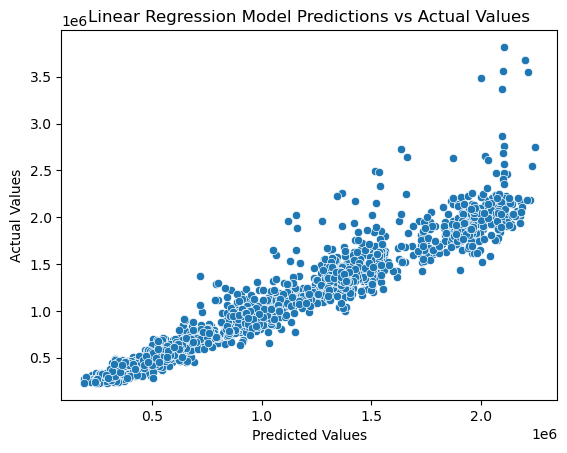

In [54]:
sns.scatterplot(x=lm2_test_preds, y=y_test)
plt.title('Linear Regression Model Predictions vs Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

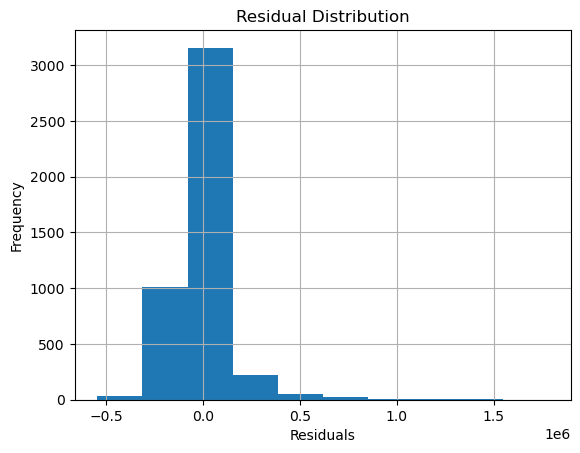

In [55]:
lm2.resid.hist()
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

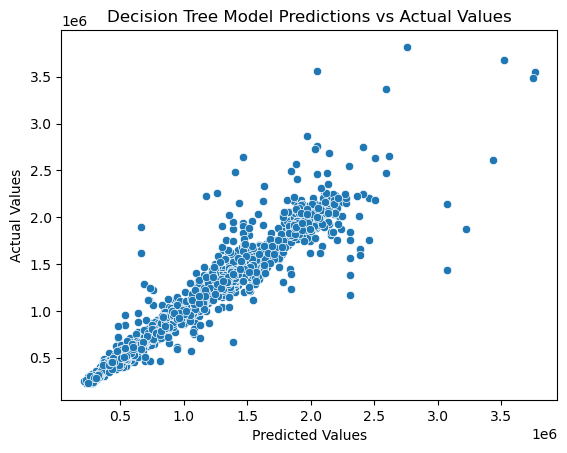

In [56]:
sns.scatterplot(x=tree_test_preds, y=y_test)
plt.title('Decision Tree Model Predictions vs Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()